In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
csv_file_path = "/content/03-02-2018.csv"

In [ ]:
df = pd.read_csv(csv_file_path)
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9.0,7.0,553.0,3773.0,202.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2.0,1.0,38.0,0.0,38.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11.0,15.0,1086.0,10527.0,385.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9.0,13.0,1285.0,6141.0,517.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Numerical Columns:\n", numerical_cols)

Numerical Columns:
 Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',

In [ ]:
selected_cols = numerical_cols[:5]
print("Selected Numerical Columns:", selected_cols)

Selected Numerical Columns: Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts'],
      dtype='object')


In [ ]:
missing_values = df[selected_cols].isnull().sum()
print("Missing Values in Selected Columns:\n", missing_values)

inf_values = df[selected_cols].apply(lambda x: np.isinf(x).sum())
print("Infinite Values in Selected Columns:\n", inf_values)


Missing Values in Selected Columns:
 Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     1
Tot Bwd Pkts     1
dtype: int64
Infinite Values in Selected Columns:
 Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
dtype: int64


In [ ]:
# Replace infinite values with NaN
df[selected_cols] = df[selected_cols].replace([np.inf, -np.inf], np.nan)

# Fill missing values with column mean
df[selected_cols] = df[selected_cols].fillna(df[selected_cols].mean())


In [ ]:
stats = df[numerical_cols].agg(['mean', 'median', 'var', 'std', 'skew', 'kurt']).T
print("Summary Statistics:\n", stats)

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


Summary Statistics:
                        mean  median           var           std        skew  \
Dst Port       8.184371e+03  8080.0  5.385976e+07  7.338921e+03    5.194816   
Protocol       6.333204e+00     6.0  4.511851e+00  2.124112e+00    4.232157   
Flow Duration  3.413802e+06  9828.0  3.462299e+14  1.860725e+07    5.694617   
Tot Fwd Pkts   4.476525e+00     3.0  4.404606e+02  2.098715e+01   61.593673   
Tot Bwd Pkts   3.670687e+00     4.0  1.058794e+03  3.253912e+01  154.771668   
...                     ...     ...           ...           ...         ...   
Active Min     1.677986e+05     0.0  9.725952e+12  3.118646e+06   23.753790   
Idle Mean      5.952408e+05     0.0  2.329377e+13  4.826362e+06   10.804283   
Idle Std       5.520796e+04     0.0  7.208146e+11  8.490080e+05   29.524679   
Idle Max       6.414113e+05     0.0  2.571411e+13  5.070909e+06   10.321296   
Idle Min       5.441014e+05     0.0  2.181847e+13  4.671024e+06   11.481183   

                       kurt  


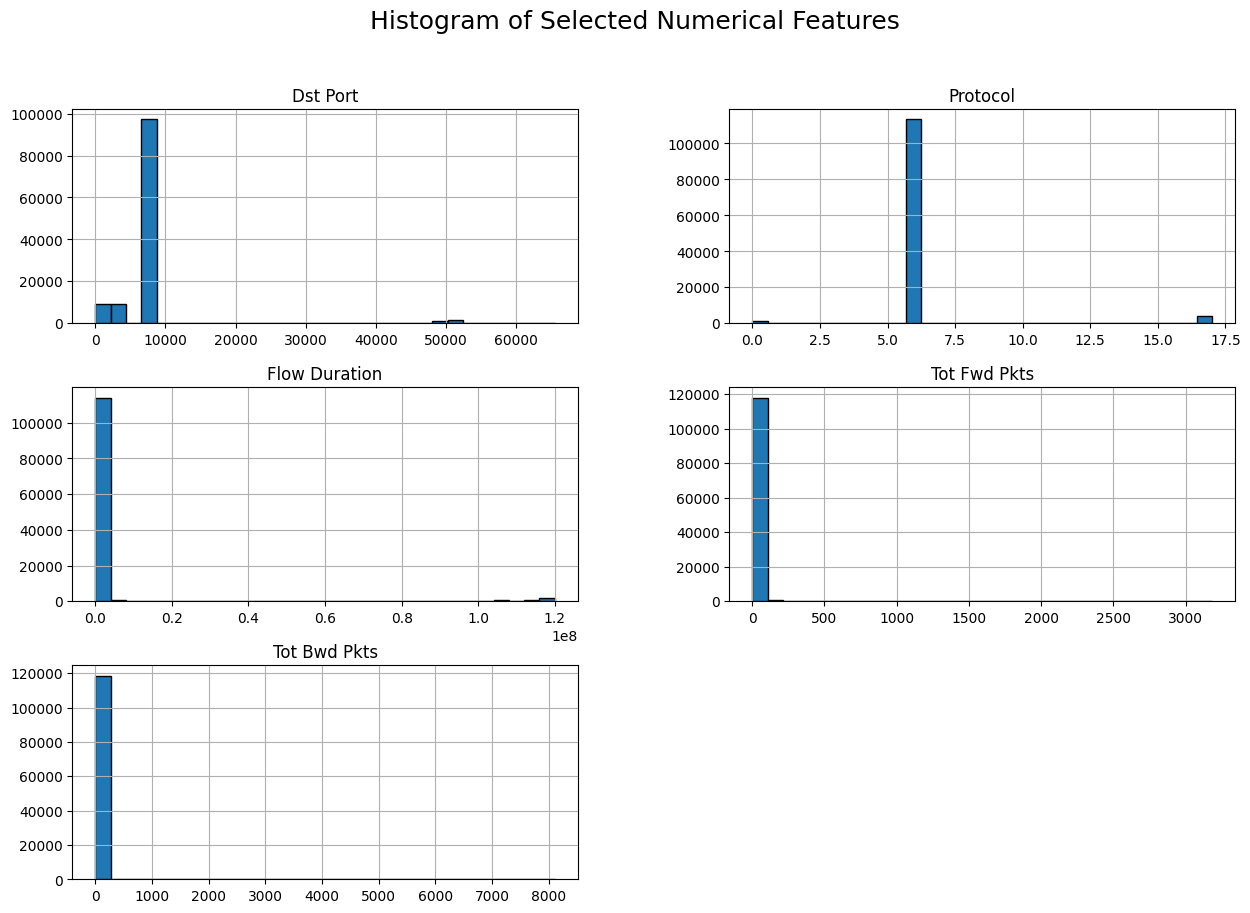

In [ ]:
df[selected_cols].hist(figsize=(15, 10), bins=30, edgecolor="black")
plt.suptitle("Histogram of Selected Numerical Features", fontsize=18)
plt.show()

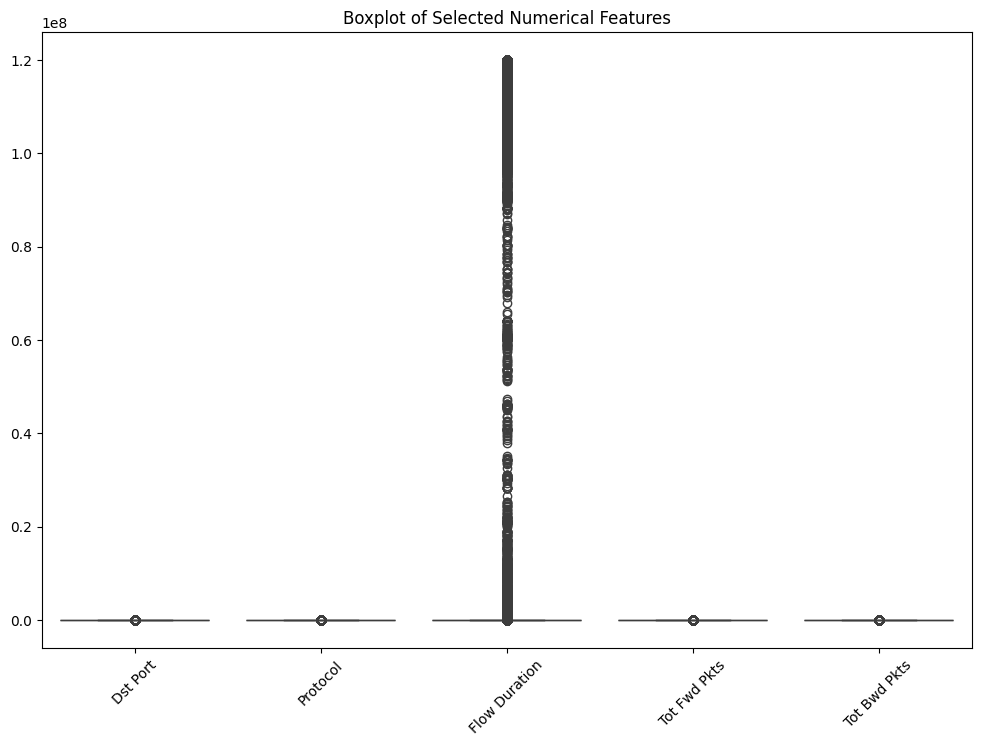

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[selected_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Numerical Features")
plt.show()

In [ ]:
Q1 = df[selected_cols].quantile(0.25)
Q3 = df[selected_cols].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[selected_cols] < (Q1 - 1.5 * IQR)) | (df[selected_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nShape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_no_outliers.shape)



Shape before outlier removal: (118660, 80)
Shape after outlier removal: (96390, 80)


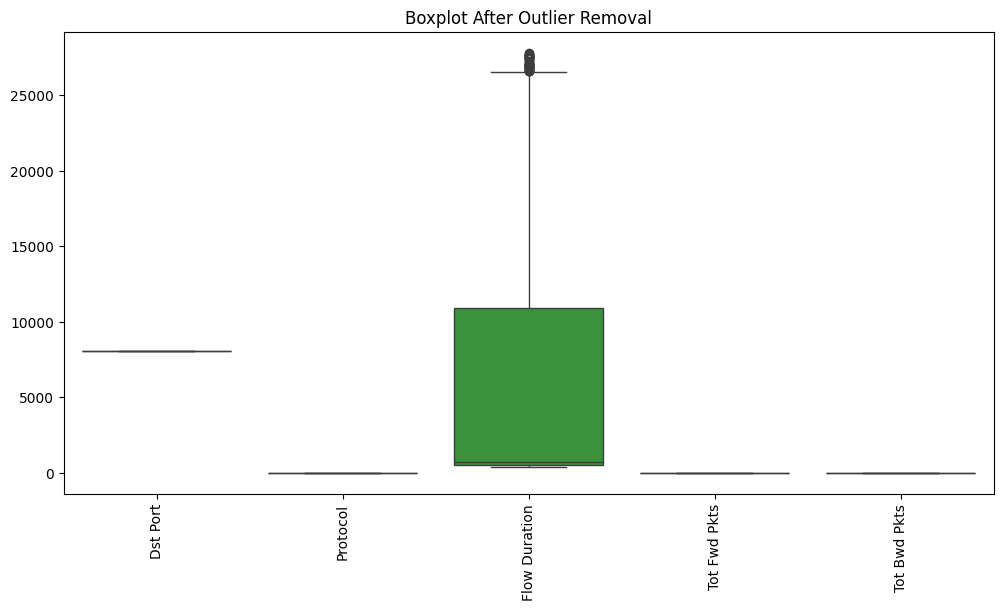

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[selected_cols])
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Removal")
plt.show()

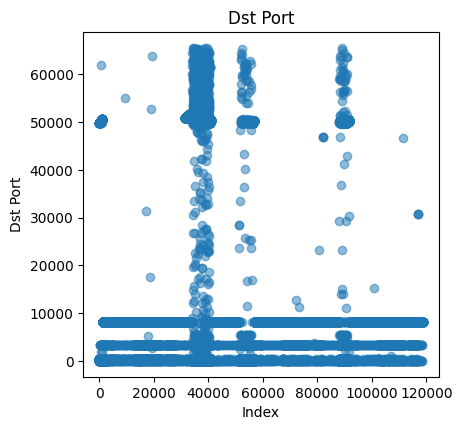

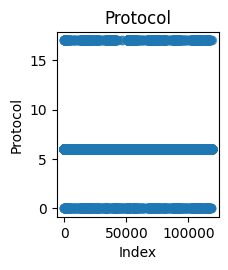

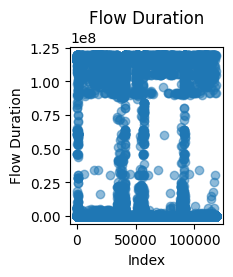

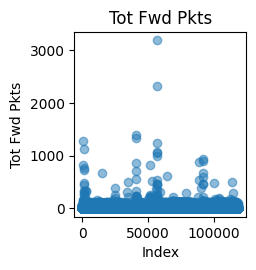

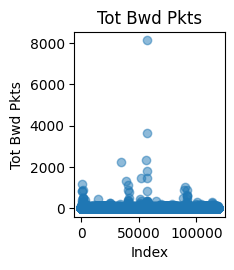

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_cols):
     plt.subplot(2, 3, i + 1)  # Adjust grid for 5 columns
     plt.scatter(df.index, df[col], alpha=0.5)
     plt.title(col)
     plt.xlabel("Index")
     plt.ylabel(col)
     plt.tight_layout()
     plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [ ]:
X = df_no_outliers[selected_cols]
y = df_no_outliers['Label']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(X)
print(y)

        Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts
1234        8080         6          16079      3.000000      4.000000
1235        8080         6            577      2.000000      0.000000
1236        8080         6          10279      3.000000      4.000000
1237        8080         6            457      2.000000      0.000000
1240        8080         6          10271      3.000000      4.000000
...          ...       ...            ...           ...           ...
118655      8080         6          10374      3.000000      4.000000
118656      8080         6            470      2.000000      0.000000
118657      8080         6          10997      3.000000      4.000000
118658      8080         6            541      2.000000      0.000000
118659      8080         6          10281      4.476525      3.670687

[96390 rows x 5 columns]
[0 0 0 ... 0 0 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

In [ ]:
print(y_train)

[0 0 0 ... 0 0 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")



Random Forest Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


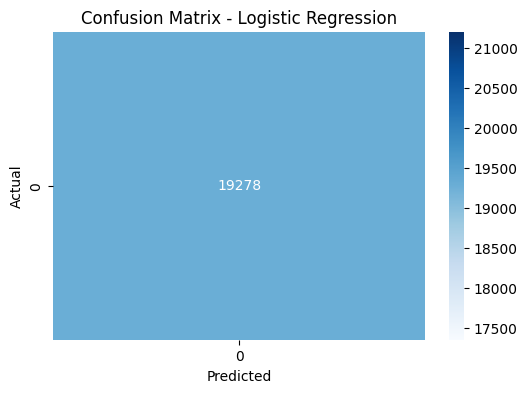

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4)) # This line was indented, causing the error.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
results_df = pd.DataFrame(results).T
results_df


In [ ]:
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In [ ]:
from scipy.stats import ztest
import numpy as np


In [ ]:
# Select a numerical column for Z-test (change 'column_name' accordingly)
column_name = selected_cols[0]  # Choosing the first numerical column
sample_data = df[column_name].dropna()  # Drop NaN values

# Define population mean (Hypothetical, change as needed)
population_mean = 50

# Perform a one-sample Z-test
z_stat, p_value = ztest(sample_data, value=population_mean)

# Print results
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")


In [ ]:
# Select two numerical columns
col1, col2 = selected_cols[:2]

# Perform a two-sample Z-test
z_stat, p_value = ztest(df[col1].dropna(), df[col2].dropna())

# Print results
print(f"Two-Sample Z-Statistic: {z_stat:.4f}")
print(f"Two-Sample P-Value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two samples.")
